In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# 1. Cargar dataset
df = pd.read_csv("transacciones_fraude.csv")

In [4]:
# 2. Convertir variables categóricas a numéricas
labelencoder = LabelEncoder()
df["tipo_transaccion"] = labelencoder.fit_transform(df["tipo_transaccion"])
df["ubicacion"] = labelencoder.fit_transform(df["ubicacion"])

In [5]:
# 3. Normalizar columnas numéricas
scaler = StandardScaler()
df[["monto", "saldo_despues", "hora"]] = scaler.fit_transform(df[["monto", "saldo_despues", "hora"]])

In [6]:
# 4. Separar características (X) y variable objetivo (y)
X = df.drop(["id_transaccion", "fraude"], axis=1)
y = df["fraude"]

In [7]:
# 5. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 6. Entrenar modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# 7. Predicciones
y_pred = modelo.predict(X_test)

In [10]:
# 8. Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2%}")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Precisión del modelo: 96.50%

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.00      0.00      0.00        35

    accuracy                           0.96      1000
   macro avg       0.48      0.50      0.49      1000
weighted avg       0.93      0.96      0.95      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


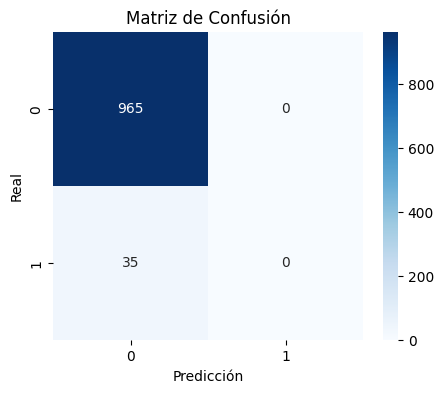

In [11]:
# 9. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [12]:
# 10. Importancia de características
importances = modelo.feature_importances_
feature_names = X.columns

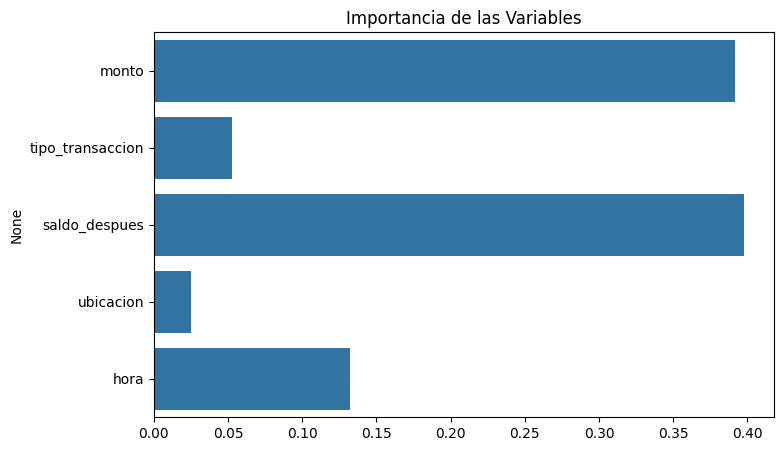

In [14]:
# 11. Importancia de Variables
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Importancia de las Variables")
plt.show()